In [1]:
# Generative AI–Driven Cattle Health Advisor (African Context)

# Goal:
# This notebook builds an AI system that analyzes descriptive cattle condition data and generates veterinary advice using generative AI.

# - Input: Descriptive conditions (e.g., "High temperature", "Low milk production")
# - Output: Predicted health status + natural-language advice  
# - Dataset: `data/cattle_health_dataset.csv`


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
df = pd.read_csv("../data/cattle_health_dataset.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (89, 14)


,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status
0,38.2,Cross Breed,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,extremely firm,unhealthy
1,38.9,Normal Breed,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,ideal,healthy
2,38.6,Cross Breed,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,ideal,healthy
3,39.5,Normal Breed,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,Black faece,unhealthy
4,39.7,Normal Breed,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,ideal,healthy


In [4]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_temperature      89 non-null     float64
 1   breed_type            89 non-null     object 
 2   milk_production       89 non-null     float64
 3   respiratory_rate      89 non-null     int64  
 4   walking_capacity      89 non-null     int64  
 5   sleeping_duration     89 non-null     float64
 6   body_condition_score  89 non-null     int64  
 7   heart_rate            89 non-null     int64  
 8   eating_duration       89 non-null     float64
 9   lying_down_duration   89 non-null     float64
 10  ruminating            89 non-null     float64
 11  rumen_fill            89 non-null     int64  
 12  faecal_consistency    89 non-null     object 
 13  health_status         89 non-null     object 
dtypes: float64(6), int64(5), object(3)
memory usage: 9.9+ KB


,count,mean,std,min,25%,50%,75%,max
body_temperature,89.0,39.011236,0.874700,35.5,38.3,38.9,39.7,40.6
milk_production,89.0,14.770787,6.634504,5.1,9.7,13.6,21.2,26.5
respiratory_rate,89.0,28.685393,9.796330,14.0,21.0,28.0,36.0,49.0
walking_capacity,89.0,9303.179775,3246.574697,5004.0,6019.0,11203.0,12291.0,13257.0
sleeping_duration,89.0,4.934831,1.564093,2.8,3.5,4.2,6.5,7.2
body_condition_score,89.0,2.910112,1.258069,1.0,2.0,3.0,4.0,5.0
heart_rate,89.0,53.955056,13.195135,37.0,42.0,50.0,63.0,83.0
eating_duration,89.0,2.825843,0.762700,1.3,2.2,2.9,3.4,4.9
lying_down_duration,89.0,13.957303,1.516941,6.0,12.9,13.8,15.1,16.4
ruminating,89.0,4.888764,1.176806,3.0,3.6,5.0,5.9,7.0


In [5]:
# Handle missing data if any
print("Missing values before handling:")
print(df.isnull().sum())

# Handle numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Handle categorical columns  
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables for modeling
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print("\nMissing values after handling:")
print(df.isnull().sum())
print("\nData types after encoding:")
print(df.dtypes)

Missing values before handling:
body_temperature        0
breed_type              0
milk_production         0
respiratory_rate        0
walking_capacity        0
sleeping_duration       0
body_condition_score    0
heart_rate              0
eating_duration         0
lying_down_duration     0
ruminating              0
rumen_fill              0
faecal_consistency      0
health_status           0
dtype: int64

Missing values after handling:
body_temperature        0
breed_type              0
milk_production         0
respiratory_rate        0
walking_capacity        0
sleeping_duration       0
body_condition_score    0
heart_rate              0
eating_duration         0
lying_down_duration     0
ruminating              0
rumen_fill              0
faecal_consistency      0
health_status           0
dtype: int64

Data types after encoding:
body_temperature        float64
breed_type                int64
milk_production         float64
respiratory_rate          int64
walking_capacity          

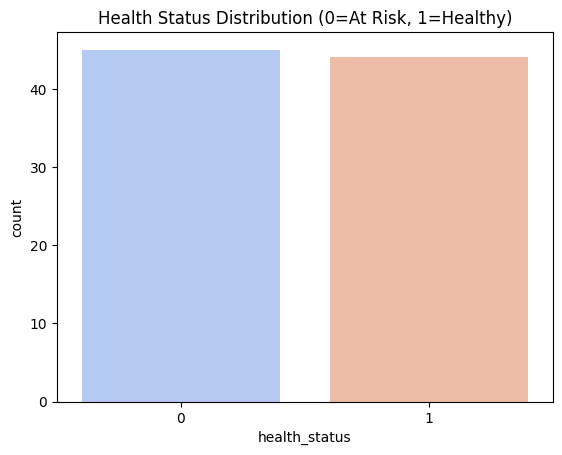

In [6]:
# Class distribution
sns.countplot(x='health_status', data=df, palette='coolwarm')
plt.title("Health Status Distribution (0=At Risk, 1=Healthy)")
plt.savefig("../notebooks/figures/class_distribution.png")
plt.show()

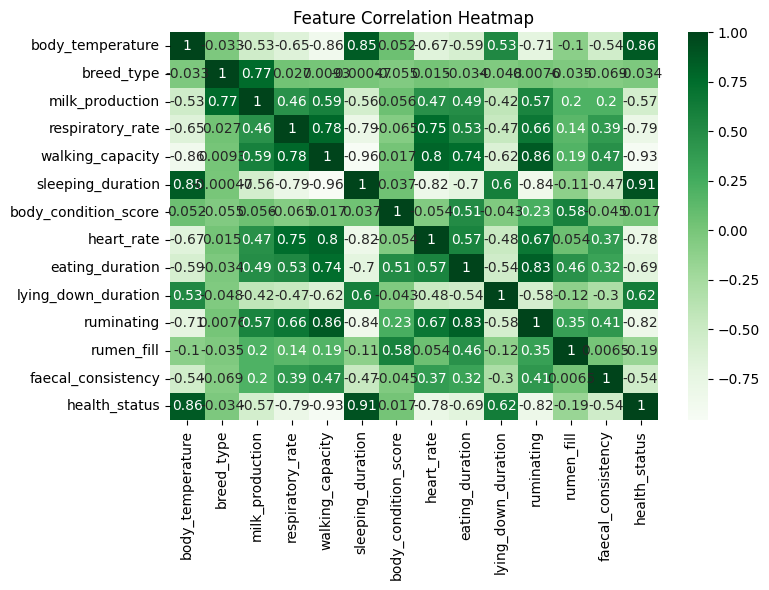

In [7]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("../notebooks/figures/feature_correlation.png")
plt.show()

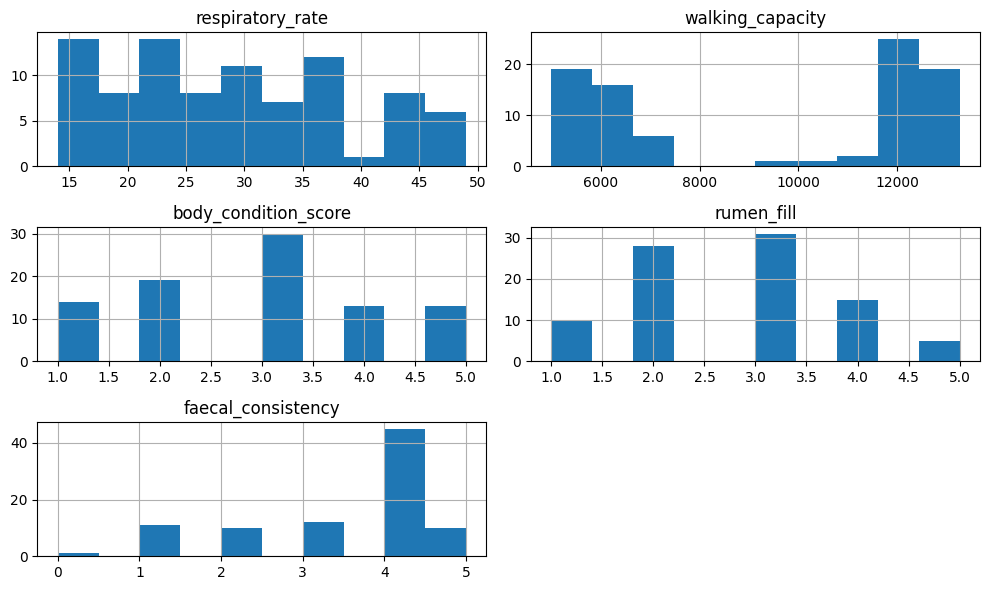

In [8]:
# Quick feature visualization
num_cols = ['respiratory_rate', 'walking_capacity', 'body_condition_score', 'rumen_fill', 'faecal_consistency']
df[num_cols].hist(figsize=(10,6))
plt.tight_layout()
plt.savefig("../notebooks/figures/distributions.png")
plt.show()


In [9]:
# Data preparation
X = df.drop(columns=['health_status'])
y = df['health_status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

🔹 Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



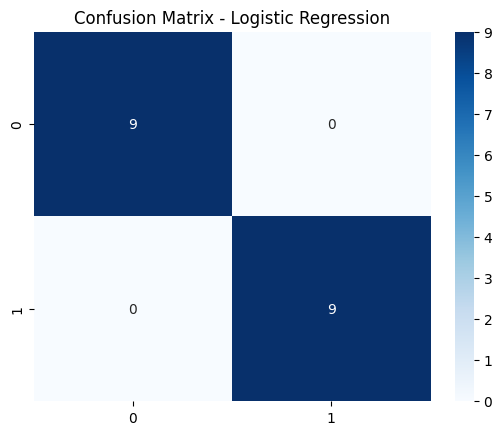

In [10]:
# Baseline model: logistic regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
print("🔹 Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr),3))
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("../notebooks/figures/confusion_logreg.png")
plt.show()

🔹 Random Forest Accuracy: 0.944
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.89      0.94         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



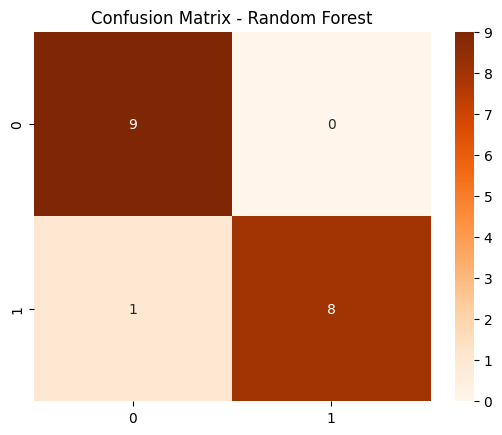

In [11]:
# Improved model: Random forest
rf = RandomForestClassifier(n_estimators=120, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("🔹 Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf),3))
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.savefig("../notebooks/figures/confusion_rf.png")
plt.show()

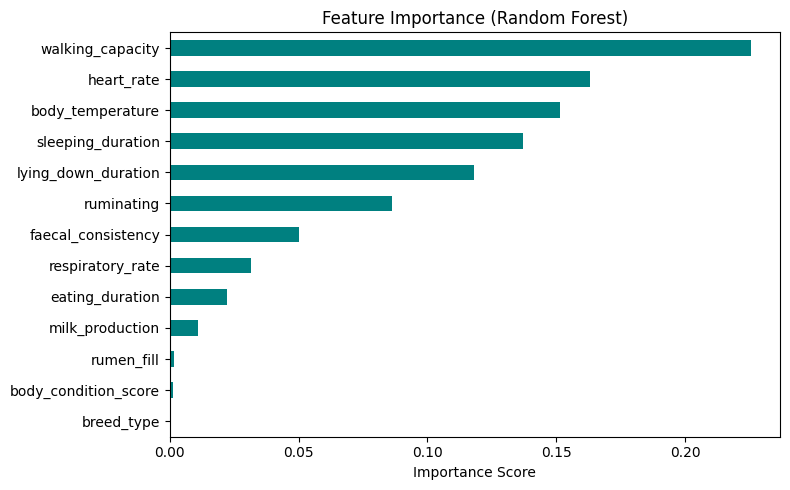

In [12]:
# Feature importance
feat_imp = pd.Series(rf.feature_importances_, index=df.drop(columns=['health_status']).columns)
feat_imp.sort_values().plot(kind='barh', figsize=(8,5), color='teal')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("../notebooks/figures/feature_importance.png")
plt.show()

In [13]:
# SAve trained model and scaler
joblib.dump(rf, "../models/cattle_rf_model.joblib")
joblib.dump(scaler, "../models/scaler.joblib")
print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [14]:
# Test quick prediction
sample = X_test[0].reshape(1, -1)
pred = rf.predict(sample)[0]
print("Sample Prediction:", "Healthy" if pred==1 else "At Risk")

Sample Prediction: Healthy
